In [1]:
%pip install numpy scipy scikit-learn pandas joblib torch deap update_checker tqdm stopit xgboost 
%pip install dask[delayed] dask[dataframe] dask-ml 
%pip install scikit-mdr skrebate
%pip install seaborn matplotlib
%pip install setuptools
%pip install matplotlib
%pip install niapy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from scipy.io import arff

# Load the ARFF file
data, meta = arff.loadarff('dataset')

# Convert it into a pandas DataFrame
dataset = pd.DataFrame(data)

# Display the first few rows of the DataFrame
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


# Data Exploration

In [3]:
# Check for any null values in the filtered dataset
null_data = dataset.isnull().sum()
null_data

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

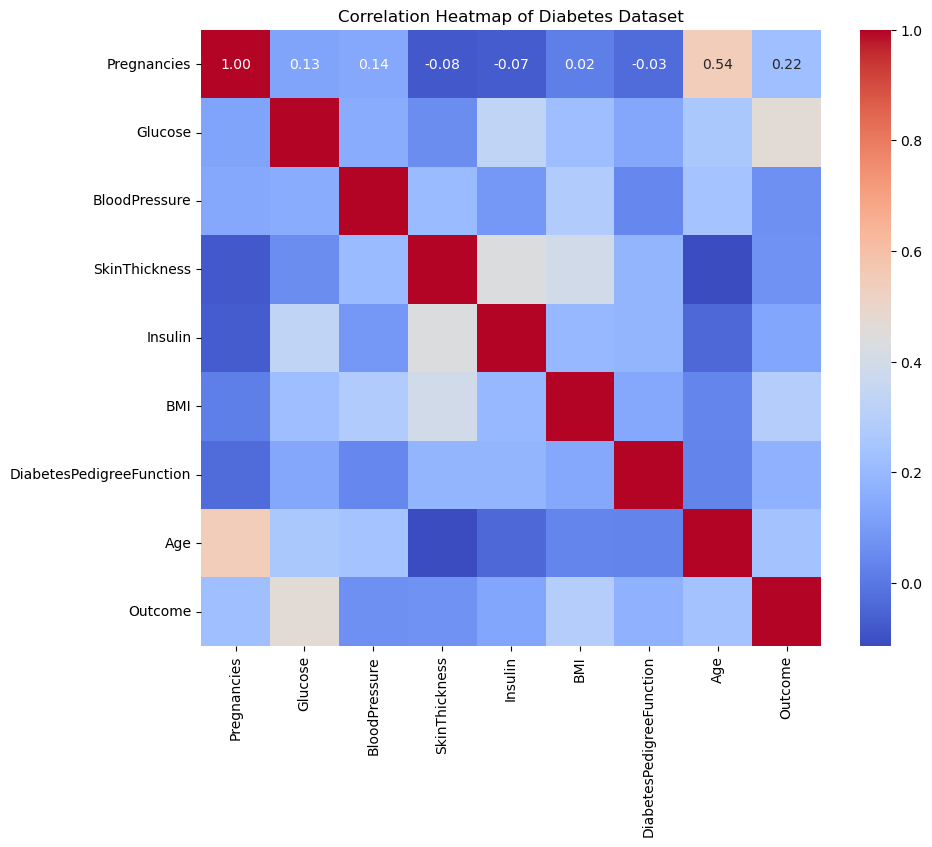

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate the correlation matrix
corr = dataset.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of Diabetes Dataset')
plt.show()

In [5]:
# Extract the correlation values against 'Outcome'
outcome_corr = dataset.corr()['Outcome'].sort_values()

# Display the correlation values
outcome_corr

BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
DiabetesPedigreeFunction    0.173844
Pregnancies                 0.221898
Age                         0.238356
BMI                         0.292695
Glucose                     0.466581
Outcome                     1.000000
Name: Outcome, dtype: float64

In [6]:
# Drop columns with correlation less than 0.15 against 'Outcome'
filtered_dataset = dataset.drop(outcome_corr[outcome_corr < 0.15].index, axis=1)

# Show the new dataframe information
filtered_dataset.info(), filtered_dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BMI                       768 non-null    float64
 3   DiabetesPedigreeFunction  768 non-null    float64
 4   Age                       768 non-null    float64
 5   Outcome                   768 non-null    float64
dtypes: float64(6)
memory usage: 36.1 KB


(None,
    Pregnancies  Glucose   BMI  DiabetesPedigreeFunction   Age  Outcome
 0          6.0    148.0  33.6                     0.627  50.0      1.0
 1          1.0     85.0  26.6                     0.351  31.0      0.0
 2          8.0    183.0  23.3                     0.672  32.0      1.0
 3          1.0     89.0  28.1                     0.167  21.0      0.0
 4          0.0    137.0  43.1                     2.288  33.0      1.0)

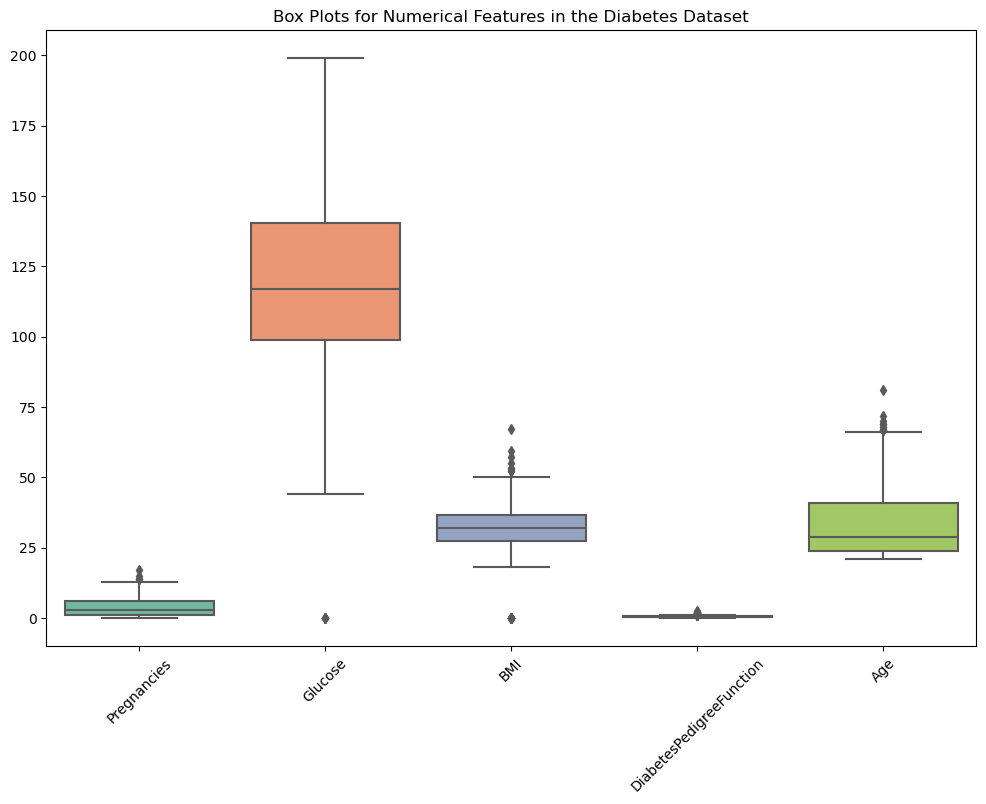

In [7]:
# Create box plots for each feature to identify outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_dataset.drop(columns=["Outcome"]), palette="Set2")
plt.title('Box Plots for Numerical Features in the Diabetes Dataset')
plt.xticks(rotation=45)  # Rotating the x labels for better visibility
plt.show()

In [8]:
# Perform IQR capping on the previously filtered columns
Q1 = filtered_dataset.quantile(0.25)
Q3 = filtered_dataset.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Capping the outliers
capped_dataset = filtered_dataset.apply(lambda x: np.where(x < lower_bound[x.name], lower_bound[x.name], x), axis=0)
capped_dataset = capped_dataset.apply(lambda x: np.where(x > upper_bound[x.name], upper_bound[x.name], x), axis=0)

# Provide basic descriptive statistics to compare the effect
capped_dataset.describe()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.837240,121.136230,32.125065,0.458914,33.199870,0.348958
std,3.344157,31.187468,7.049584,0.285596,11.628404,0.476951
min,0.000000,37.125000,13.350000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,36.600000,0.626250,41.000000,1.000000
max,13.500000,199.000000,50.550000,1.200000,66.500000,1.000000


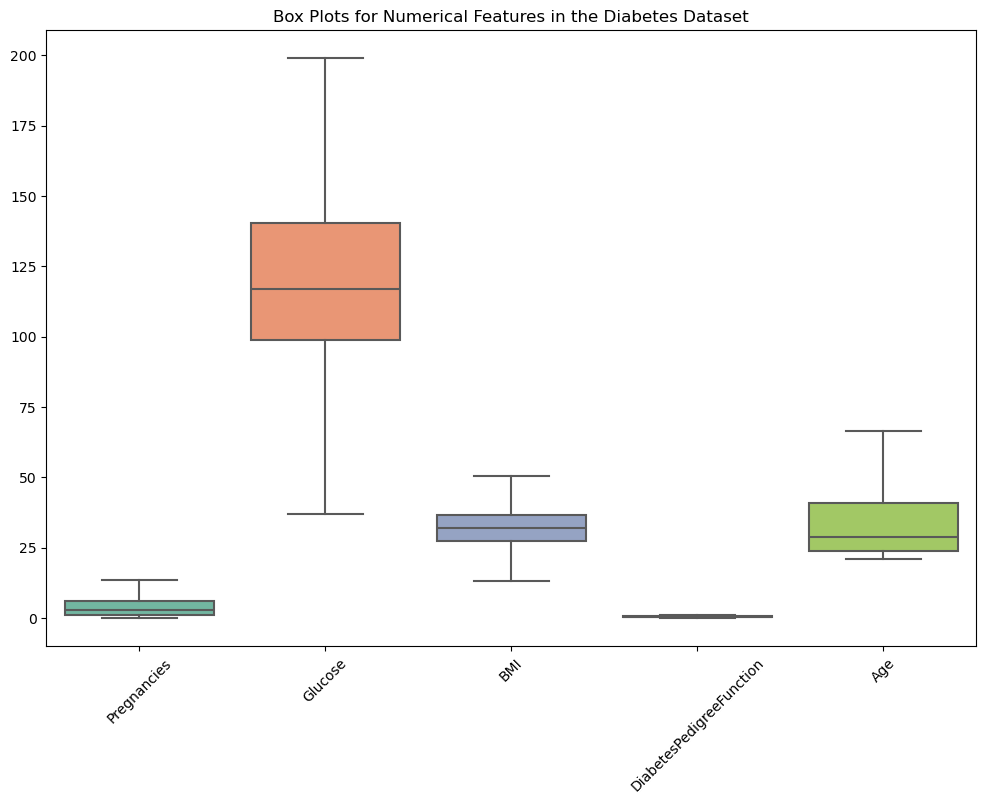

In [9]:
# Create box plots for each feature to identify outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=capped_dataset.drop(columns=["Outcome"]), palette="Set2")
plt.title('Box Plots for Numerical Features in the Diabetes Dataset')
plt.xticks(rotation=45)  # Rotating the x labels for better visibility
plt.show()

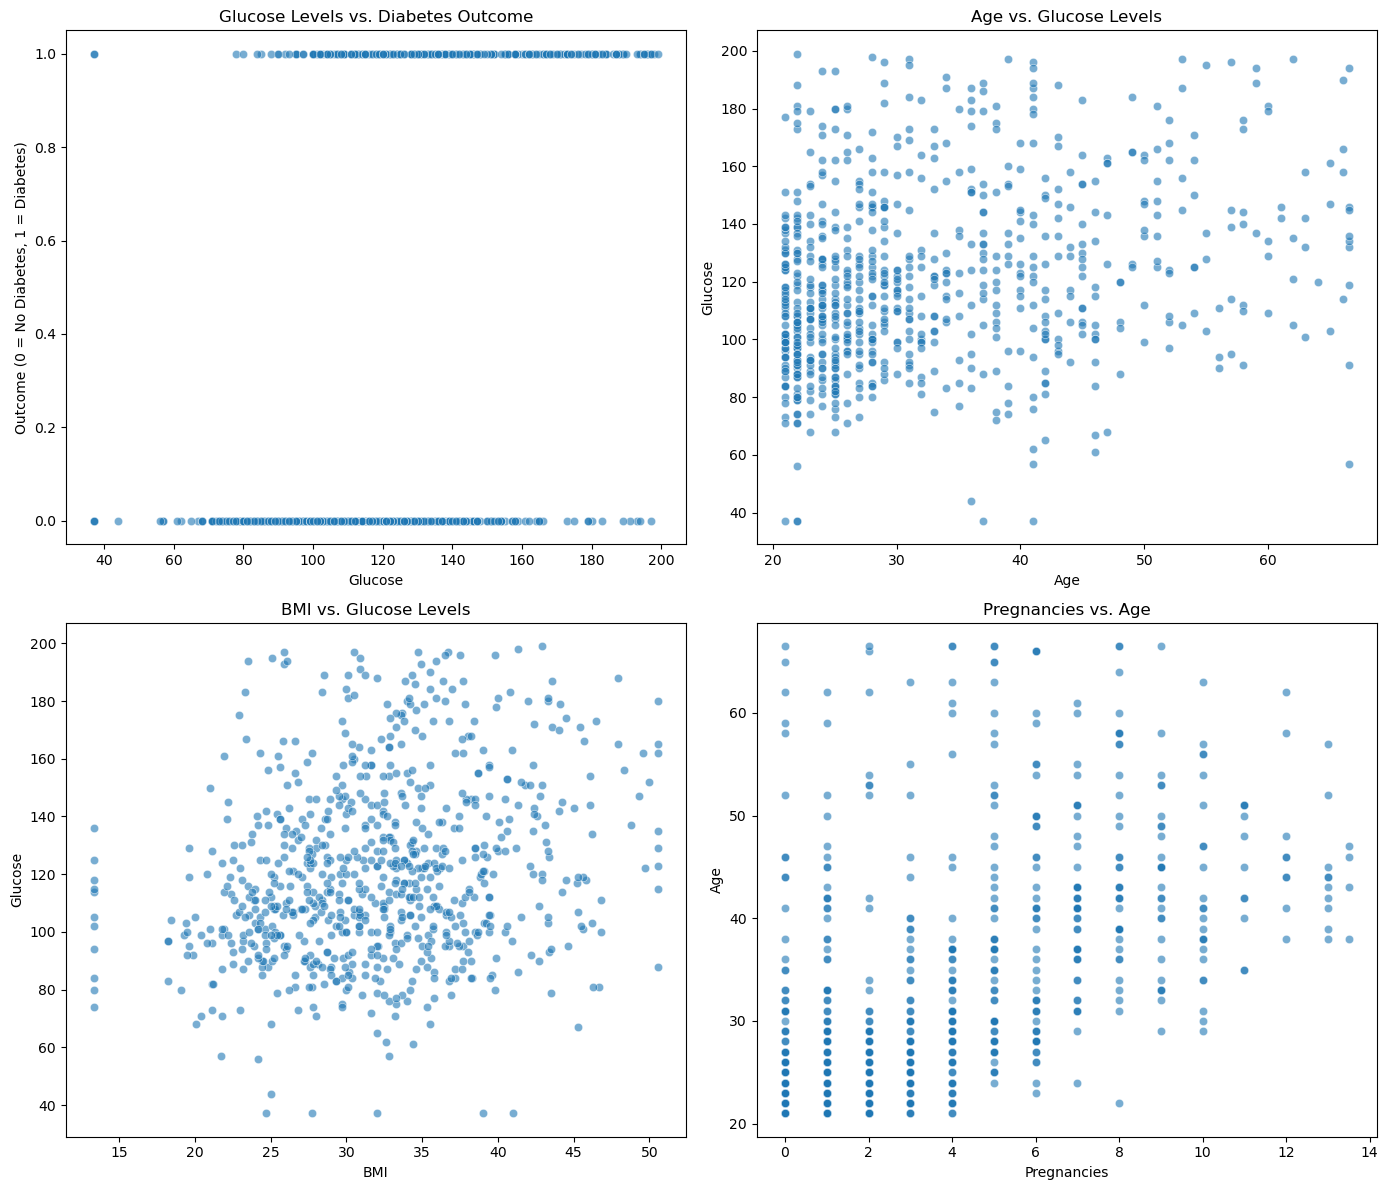

In [10]:
# Creating multiple scatter plots to visualize relationships between different variables
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Plot 1: Glucose vs. Outcome
sns.scatterplot(data=capped_dataset, x='Glucose', y='Outcome', ax=axs[0, 0], alpha=0.6)
axs[0, 0].set_title('Glucose Levels vs. Diabetes Outcome')
axs[0, 0].set_xlabel('Glucose')
axs[0, 0].set_ylabel('Outcome (0 = No Diabetes, 1 = Diabetes)')

# Plot 2: Age vs. Glucose
sns.scatterplot(data=capped_dataset, x='Age', y='Glucose', ax=axs[0, 1], alpha=0.6)
axs[0, 1].set_title('Age vs. Glucose Levels')
axs[0, 1].set_xlabel('Age')
axs[0, 1].set_ylabel('Glucose')

# Plot 3: BMI vs. Glucose
sns.scatterplot(data=capped_dataset, x='BMI', y='Glucose', ax=axs[1, 0], alpha=0.6)
axs[1, 0].set_title('BMI vs. Glucose Levels')
axs[1, 0].set_xlabel('BMI')
axs[1, 0].set_ylabel('Glucose')

# Plot 4: Pregnancies vs. Age
sns.scatterplot(data=capped_dataset, x='Pregnancies', y='Age', ax=axs[1, 1], alpha=0.6)
axs[1, 1].set_title('Pregnancies vs. Age')
axs[1, 1].set_xlabel('Pregnancies')
axs[1, 1].set_ylabel('Age')

plt.tight_layout()
plt.show()


# Niapy Implementation

In [11]:
from niapy.task import Task
from niapy.problems import Problem
from niapy.algorithms.basic import GreyWolfOptimizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

In [12]:
class RFHyperparameterOptimization(Problem):
    # Constructor method to initialize the class
    def __init__(self, training_features, training_target, **kwargs):
        # Initialize instance variables with the provided training data
        self.training_features = training_features
        self.training_target = training_target
        # Call the parent class constructor with dimensions and boundary constraints
        super().__init__(dimension=3, lower=[10, 1, 2], upper=[200, 20, 10], **kwargs)

    # Evaluation method to be called during optimization
    def _evaluate(self, x):
        # Extract hyperparameters from the input vector x
        n_estimators = int(x[0])
        min_samples_leaf = int(x[1])
        min_samples_split = int(x[2])
        # Create a machine learning pipeline with scaling and RandomForestClassifier
        pipeline = make_pipeline(
            MinMaxScaler(),  # Scale features to range [0, 1]
            RandomForestClassifier(
                bootstrap=True,  # Use bootstrap samples
                criterion="entropy",  # Use entropy criterion for splitting
                max_features=0.5,  # Use 50% of features at each split
                min_samples_leaf=min_samples_leaf,  # Minimum samples per leaf node
                min_samples_split=min_samples_split,  # Minimum samples per split
                n_estimators=n_estimators  # Number of trees in the forest
            )
        )
        # Train the pipeline on the training data
        pipeline.fit(self.training_features, self.training_target)
        # Return the error (1 - accuracy) on the training data, as we aim to minimize this value
        return 1.0 - pipeline.score(self.training_features, self.training_target)


In [13]:
from sklearn.model_selection import train_test_split

X = capped_dataset.drop('Outcome', axis=1)
Y = capped_dataset['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2)


In [14]:
# Define the optimization task
task = Task(problem=RFHyperparameterOptimization(X_train, y_train), max_evals=1000)
# Create a Task object for the optimization, specifying the problem to solve (RFHyperparameterOptimization)
# with training data (X_train, y_train) and setting the maximum number of evaluations to 1000.

# Define the optimization algorithm
algorithm = GreyWolfOptimizer(population_size=10)

# Run the algorithm
best_solution = algorithm.run(task)
# Execute the optimization algorithm on the defined task, storing the best found solution in best_solution.

# Extract the best hyperparameters
n_estimators = int(best_solution[0][0])
# Convert the first element of the best solution to an integer and store it in n_estimators.

min_samples_leaf = int(best_solution[0][1])
# Convert the second element of the best solution to an integer and store it in min_samples_leaf.

min_samples_split = int(best_solution[0][2])
# Convert the third element of the best solution to an integer and store it in min_samples_split.

# Print the optimized hyperparameters
print(f'Optimized hyperparameters: n_estimators={n_estimators}, min_samples_leaf={min_samples_leaf}, min_samples_split={min_samples_split}')
# Print the optimized hyperparameters in a formatted string.


Optimized hyperparameters: n_estimators=80, min_samples_leaf=1, min_samples_split=2


In [15]:
# Train the final model with the optimized hyperparameters
final_pipeline = make_pipeline(
    MinMaxScaler(),
    RandomForestClassifier(bootstrap=True, criterion="entropy", max_features=0.5,
                           min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split,
                           n_estimators=n_estimators)
)
# Create a pipeline that scales the data using MinMaxScaler and then trains a RandomForestClassifier
# with the optimized hyperparameters (min_samples_leaf, min_samples_split, n_estimators).

final_pipeline.fit(X_train, y_train)
# Fit the final pipeline to the training data (X_train, y_train).

# Evaluate the final model
score = final_pipeline.score(X_test, y_test)
# Evaluate the fitted pipeline on the test data (X_test, y_test) and store the accuracy score in the variable 'score'.

print('Final model accuracy:', score)
# Print the accuracy score of the final model on the test data.


Final model accuracy: 0.7792207792207793
